# Plotting return vs volatility

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader
import datetime
import pandas_datareader.data as web

In [2]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2019, 1, 1)
SP = web.DataReader("^GSPC", 'yahoo', start, end)
NAS = web.DataReader("^IXIC", 'yahoo', start, end)
DOW = web.DataReader("^DJI", 'yahoo', start, end)
DAX = web.DataReader("^GDAXI", 'yahoo', start, end)

In [3]:
stocks = pd.concat([SP['Adj Close'],NAS['Adj Close'],DOW['Adj Close'], DAX['Adj Close']],axis=1)
stocks.columns = ['SP','NAS','DOW','DAX']

In [4]:
stocks.head()

,SP,NAS,DOW,DAX
Date,,,,
2010-01-04,1132.989990,2308.419922,10583.959961,6048.299805
2010-01-05,1136.520020,2308.709961,10572.019531,6031.859863
2010-01-06,1137.140015,2301.090088,10573.679688,6034.330078
2010-01-07,1141.689941,2300.050049,10606.860352,6019.359863
2010-01-08,1144.979980,2317.169922,10618.190430,6037.609863


In [5]:
# Create num amount of different portfolios
num = 100000

# Calculating the log returns of the stocks
log_ret = np.log(stocks/stocks.shift(1))

# Initialise:
# all_weight - amount of each stock compared to the whole portfolio
# ret - returns of the portfolio
# vol - volatility of the portfolio
# sharpe ratio of the portfolio
all_weights = np.zeros((num,len(stocks.columns)))
ret = np.zeros(num)
vol = np.zeros(num)
sharpe = np.zeros(num)

for i in range(num):

    # Create Random Weights
    weights = np.array(np.random.random(4))

    # Normalise Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[i,:] = weights

    # Expected Return
    ret[i] = np.sum((log_ret.mean() * weights) *252)

    # Expected Variance
    vol[i] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe[i] = ret[i]/vol[i]

In [6]:
print(sharpe.max())

0.6119564616951152


In [7]:
# Printing the portfolio with the largest sharpe ratio
all_weights[sharpe.argmax(),:]

array([0.0028674 , 0.5404243 , 0.45145013, 0.00525817])

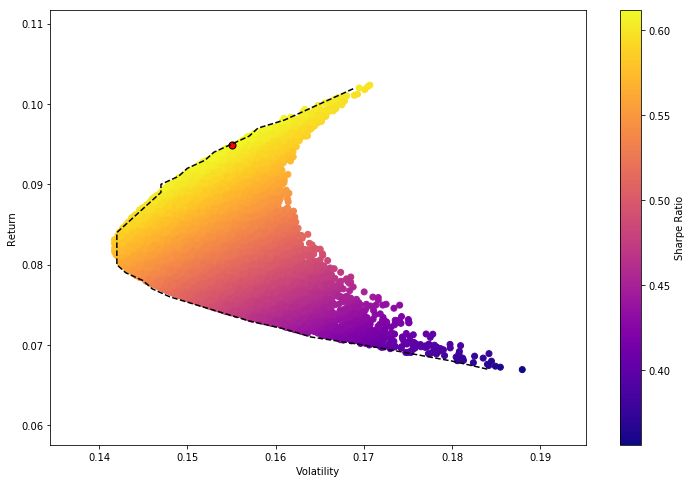

In [9]:
max_shp_ret = ret[sharpe.argmax()]
max_shp_vol = vol[sharpe.argmax()]

plt.figure(figsize=(12,8))
plt.scatter(vol,ret,c=sharpe,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add red dot for max SR
plt.scatter(max_shp_vol,max_shp_ret,c='red',s=50,edgecolors='black')

# Efficient frontier
efficient_df = pd.DataFrame(data={'vol':vol, 'ret':ret}).sort_values(by=['ret']).round(3).groupby(['ret']).min().reset_index()
plt.plot(efficient_df['vol'], efficient_df['ret'], linestyle='--', color='black')

In [10]:
def opinion_sharpe(shp):
    if shp < 0:
        return 'terrible!'
    elif shp < 0.5:
        return 'not very good.'
    elif shp < 1:
        return 'okay.'
    elif shp < 2:
        return 'good!'
    else:
        return 'outstanding!'

In [11]:
print('Max sharpe is {}, this is {}'.format(round(sharpe.max(),2), opinion_sharpe(sharpe.max())))

Max sharpe is 0.61, this is okay.
